# Clustering jerarquico y dendogramas

Antes de empezar, pongamos un poco de notacion para hablar todos el mismo idioma

* X datasets(array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con la informacion de las uniones
* k numero de clusters

In [4]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


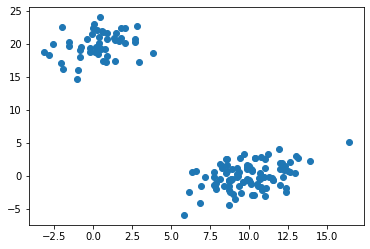

In [10]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
x = np.concatenate((a,b))
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [12]:
z = linkage(x,'ward')


In [14]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [15]:
c, coph_dist = cophenet(z, pdist(x))
c

0.9800148387574268

In [16]:
z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [17]:
z[1]

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [18]:
z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [30]:
print(z[152-len(x)]) # Cluster 152

print(z[158-len(x)]) # Cluster 156

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [22]:
x[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

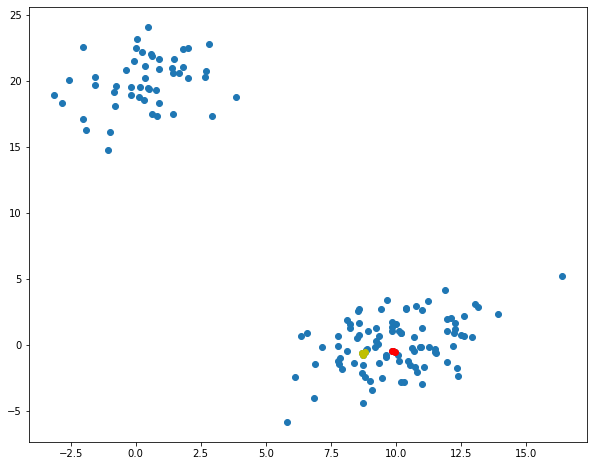

In [28]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(x[:,0], x[:,1]) # Pintar todos los puntos
plt.scatter(x[idx,0], x[idx,1], c ="r") # Destacamos en rojo el primer cluster
plt.scatter(x[idx2,0], x[idx2,1], c ="y") # Destacamos en amarillo el segundo cluster
plt.show()

## Representacion grafica de un dendrograma

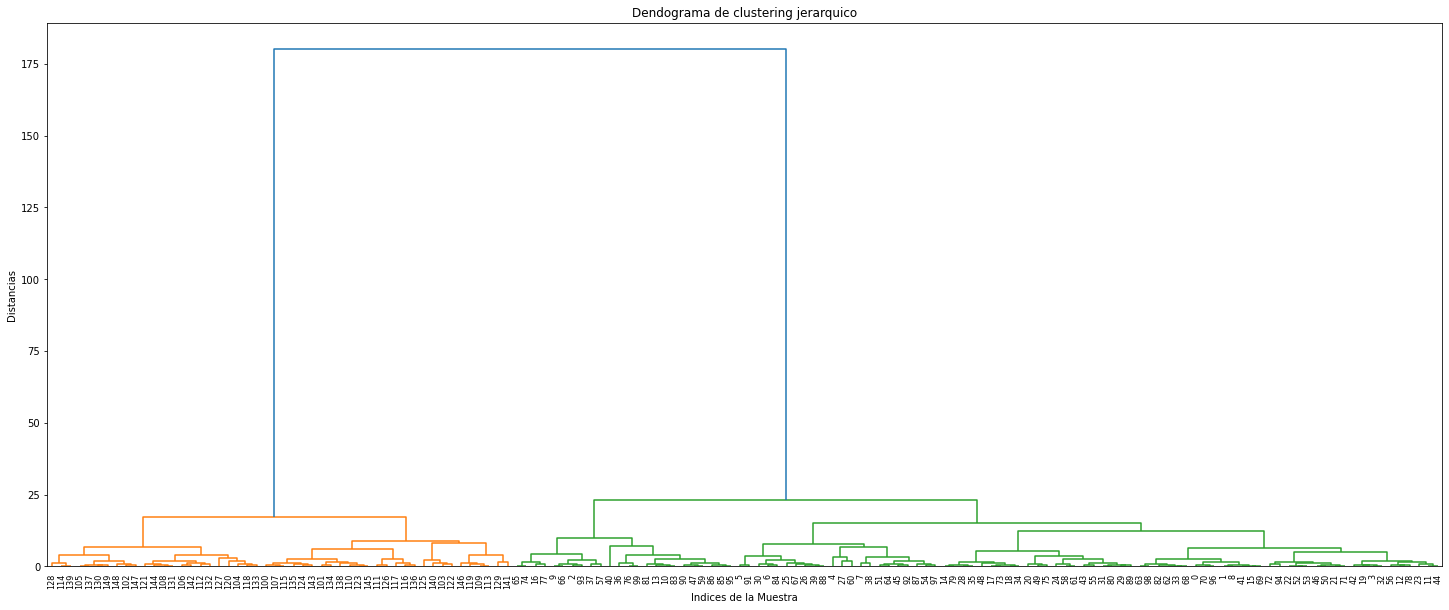

In [31]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=8.0s)
plt.show()

In [33]:
z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

## Truncar el dendrograma

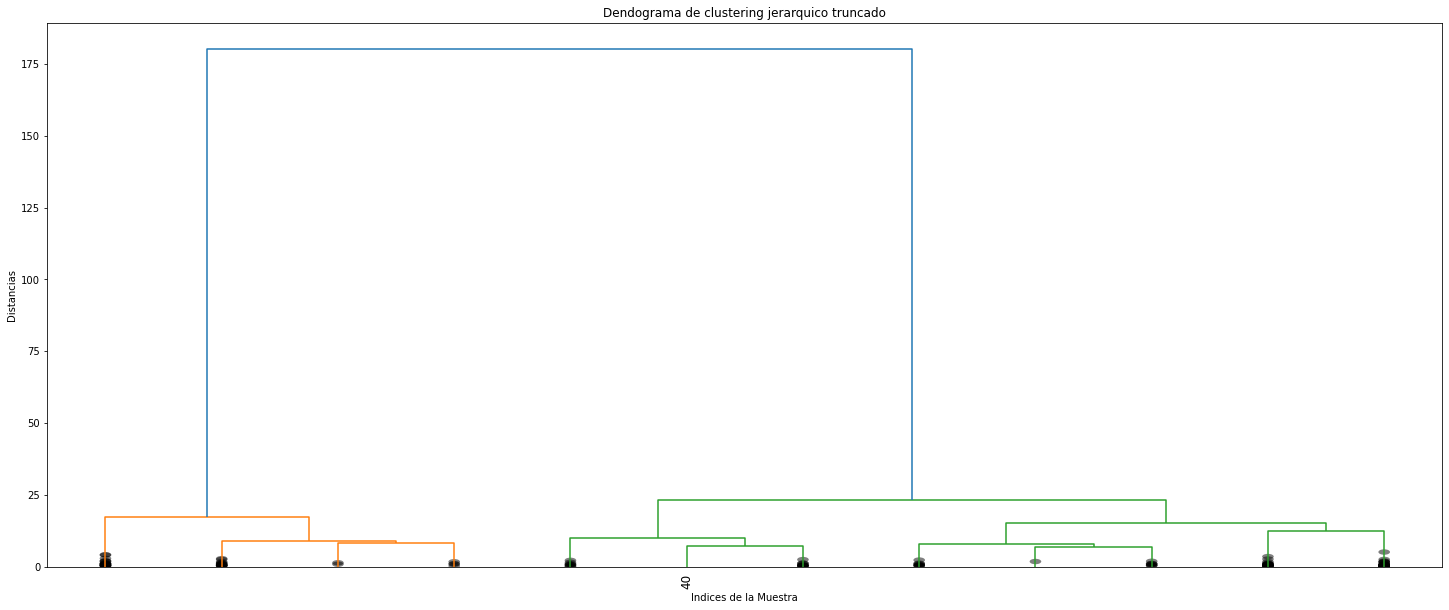

In [38]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico truncado")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=12.0, truncate_mode="lastp", p=12, show_leaf_counts=False, show_contracted=True)
plt.show()

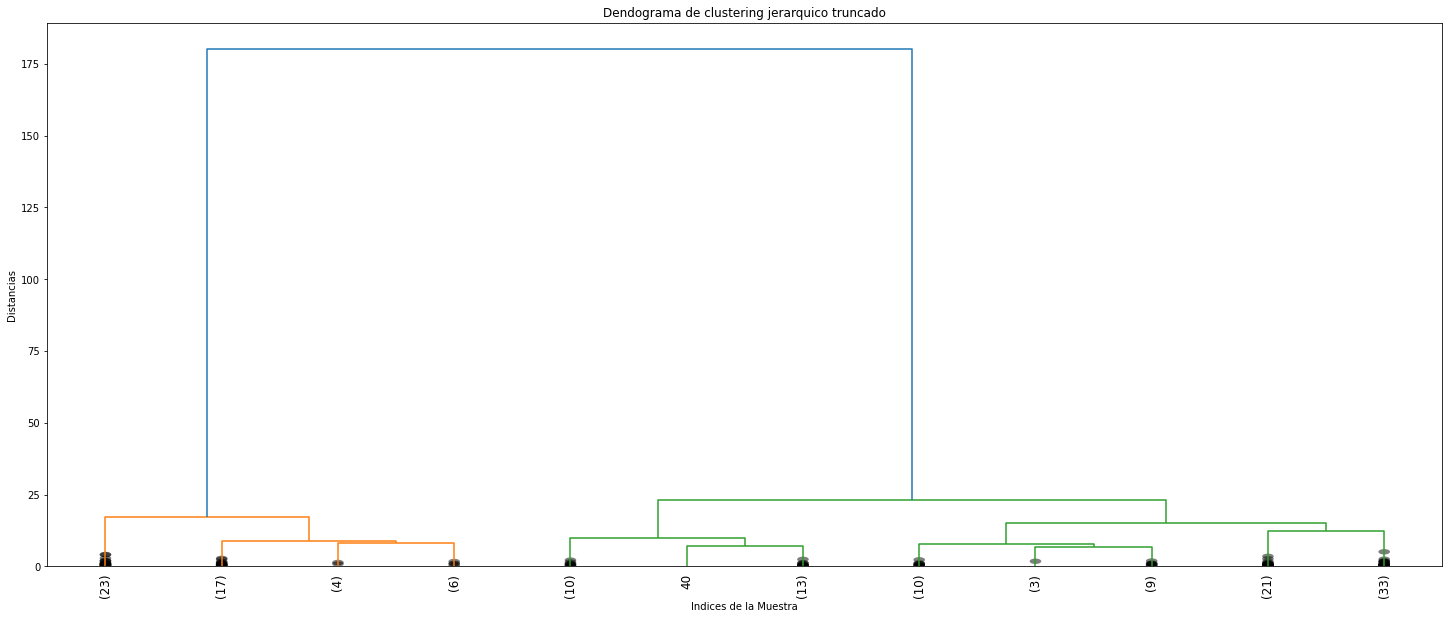

In [39]:
plt.figure(figsize=(25,10))
plt.title("Dendograma de clustering jerarquico truncado")
plt.xlabel("Indices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90., leaf_font_size=12.0, truncate_mode="lastp", p=12, show_leaf_counts=True
           , show_contracted=True)
plt.show()

## Dendrograma tuneado

In [57]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerarquico con Dendrograma truncado")
        plt.xlabel("Indice del Dataset (o tamano del cluster)")
        plt.ylabel("Distancia")
        for i,d,c in zip(ddata["icoord"], ddata['dcoord'],ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y,(x,y),xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
    if max_d:
        plt.axhline(y=max_d, c="k")
    
    return ddata

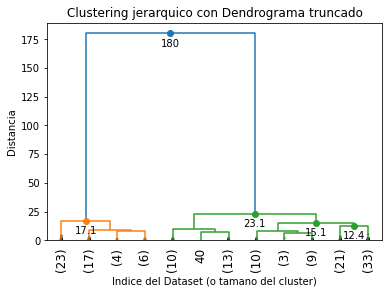

In [58]:
dendrogram_tune(z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above=10)

plt.show()